# Instructions:
1. I have tested the BERT baseline model from hugging face in three datasets.

2. To run for a specific dataset, you can directly scroll to that particular data and run the code. For example, if you want to run for the YouTube dataset, you can start running from "2.YouTube Dataset" .

3. To run the code please upload form_spring_clean.csv, twitter_clean.csv and utube_clean.csv files provided under clean_data folder.

# 1.FormSpring Dataset

###1.1 Installing dependencies and importing packages

In [1]:
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 4.6 MB 53.5 MB/s 
     |████████████████████████████████| 238 kB 71.8 MB/s 
     |████████████████████████████████| 1.3 MB 68.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.1 MB/s 
     |████████████████████████████████| 636 kB 69.7 MB/s 
     |████████████████████████████████| 352 kB 50.6 MB/s 
     |████████████████████████████████| 99 kB 9.7 MB/s 
     |████████████████████████████████| 116 kB 71.1 MB/s 
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 60.0 MB/s 
     |████████████████████████████████| 5.8 MB 12.9 MB/s 
     |████████████████████████████████| 438 kB 43.4 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 6.6 MB/s 
     |████████████████████████████████| 115 kB 71.5 MB/s 
     |████████████████████████████████| 212 kB 65.8 MB/s 
     |████████████████████████████████| 141 kB 68.8 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 127 kB 66.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 6.8 MB/s 
     |████████████████████████████████| 6.6 MB 43.7 MB/s 


In [4]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.models import load_model
import datasets
from datasets.dataset_dict import DatasetDict
from datasets import Dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
import matplotlib.pyplot as plt
from official.nlp import optimization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification
from transformers import DefaultDataCollator
from transformers import AutoTokenizer
import seaborn as sns

##1.2 Reading and preparing dataset

In [5]:
df_form=pd.read_csv('form_spring_clean.csv')

In [6]:
df_form

,Text,hate_words,Label,Text_clean,hate_words_clean,category
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech
1,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech
2,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech
3,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech
4,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0,non_hate_speech
...,...,...,...,...,...,...
17022,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0,non_hate_speech
17023,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0,non_hate_speech
17024,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0,non_hate_speech
17025,Q: if i told u den it would make it all the le...,fake scaredyy cat,1,q told u den would make less fun a would make ...,fake scaredyy cat,hate_speech


In [7]:
df_form.groupby('Label').count()

,Text,hate_words,Text_clean,hate_words_clean,category
Label,,,,,
0,13616,13616,13616,13507,13616
1,3411,3411,3411,3335,3411


In [8]:
non_hate_speech, hate_speech = np.bincount(df_form['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 17027
    non_hate_speech: 13616 (79.97% of total)

Examples:
    Total: 17027
    hate_speech: 3411 (20.03% of total)



####1.2.1 Handling imbalanced data

In [9]:
weight_for_0 = (1 / non_hate_speech)*(total)/2.0 
weight_for_1 = (1 / hate_speech)*(total)/2.0


class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.50


####1.2.2 Splitting the data between train, validation aand test sets

In [10]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df_form.index.values,
    df_form.Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_form.Label.values,    
)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    df_form.loc[X_train_].index.values,
    df_form.loc[X_train_].Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_form.loc[X_train_].Label.values,  
)

In [12]:
df_form['data_type'] = ['not_set']*df_form.shape[0]
df_form.loc[X_train, 'data_type'] = 'train'
df_form.loc[X_val, 'data_type'] = 'val'
df_form.loc[X_test, 'data_type'] = 'test'

In [13]:
df_form

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech,train
1,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech,train
2,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech,train
3,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech,train
4,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0,non_hate_speech,test
...,...,...,...,...,...,...,...
17022,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0,non_hate_speech,train
17023,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0,non_hate_speech,train
17024,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0,non_hate_speech,train
17025,Q: if i told u den it would make it all the le...,fake scaredyy cat,1,q told u den would make less fun a would make ...,fake scaredyy cat,hate_speech,test


In [14]:
df_form.groupby(['category', 'Label', 'data_type']).count()

Text  hate_words  Text_clean  \
category        Label data_type                                  
hate_speech     1     test         341         341         341   
                      train       2763        2763        2763   
                      val          307         307         307   
non_hate_speech 0     test        1362        1362        1362   
                      train      11028       11028       11028   
                      val         1226        1226        1226   

                                 hate_words_clean  
category        Label data_type                    
hate_speech     1     test                    336  
                      train                  2700  
                      val                     299  
non_hate_speech 0     test                   1351  
                      train                 10941  
                      val                    1215

In [15]:
df_train = df_form.loc[df_form["data_type"]=="train"]
df_train.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech,train
1,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech,train
2,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech,train
3,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech,train
6,Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...,0,0,q apriiiiiiiiiiiill i miss uuuu it039s emma bt...,0,non_hate_speech,train


In [16]:
df_val = df_form.loc[df_form["data_type"]=="val"]
df_val.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
60,Q: have you ever been on itellyouthat.com? go ...,0,0,q ever itellyouthat com go tell something worl...,0,non_hate_speech,val
75,Q: heyyyyyy!!! how u doin!!!!!<br>A: Im doing ...,0,0,q heyyyyyy u doin a im good thankyuh heyyy hbu,0,non_hate_speech,val
83,Q: i love youu chica!<33<br>A: NO no no! I Lov...,0,0,q love youu chica 33 a no i love youuu moreee3...,0,non_hate_speech,val
106,Q: If you could make one person fall in love w...,0,0,q if could make one person fall love would a m...,0,non_hate_speech,val
112,Q: If you had to cook dinner for someone tonig...,0,0,q if cook dinner someone tonight would make a ...,0,non_hate_speech,val


In [17]:
df_test = df_form.loc[df_form["data_type"]=="test"]
df_test.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
4,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0,non_hate_speech,test
5,Q: any makeup tips? i suck at doing my makeup ...,0,0,q makeup tips suck makeup lol a sure like tell...,0,non_hate_speech,test
9,Q: are you a trusting person?<br>A: Yes veryy ...,0,0,q trusting person a yes veryy trustin person m...,0,non_hate_speech,test
17,Q: Bitch u thee bomb like Tick TICK!<br>A: Hah...,Bitch u thee bomb like Tick TICK,1,q bitch u thee bomb like tick tick a hahah thanks,bitch u thee bomb like tick tick,hate_speech,test
64,Q: Hello bitch! How&#039;s ur day going? Good ...,0,0,q hello bitch how039s ur day going good i hope...,0,non_hate_speech,test


In [18]:
df_train

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech,train
1,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech,train
2,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech,train
3,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech,train
6,Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...,0,0,q apriiiiiiiiiiiill i miss uuuu it039s emma bt...,0,non_hate_speech,train
...,...,...,...,...,...,...,...
17021,Q: Youre at a party and your friend who drove ...,0,0,q youre party friend drove drunk won039t give ...,0,non_hate_speech,train
17022,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0,non_hate_speech,train
17023,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0,non_hate_speech,train
17024,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0,non_hate_speech,train


In [19]:
df_train['Text_clean']=df_train['Text_clean'].astype(str)
df_val['Text_clean']=df_val['Text_clean'].astype(str)
df_test['Text_clean']=df_test['Text_clean'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [20]:
df_train_text_list=list(df_train['Text_clean'])
df_train_label=list(df_train['Label'])

df_test_text_list=list(df_test['Text_clean'])
df_test_label=list(df_test['Label'])

df_val_text_list=list(df_val['Text_clean'])
df_val_label=list(df_val['Label'])

In [21]:
d = {'train':Dataset.from_dict({'text':df_train_text_list,'labels':df_train_label}),
     'test':Dataset.from_dict({'text':df_test_text_list,'labels':df_test_label}),
     'val':Dataset.from_dict({'text':df_val_text_list,'labels':df_val_label})
     }

dd=DatasetDict(d)

In [22]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


def tokenize_function(examples):
  encoded= tokenizer(examples["text"], padding="max_length", truncation=True)
  return encoded.data

tokenized_datasets = dd.map(tokenize_function, batched=True)

  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [23]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 13791
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1703
    })
    val: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1533
    })
})

In [24]:
data_collator = DefaultDataCollator(return_tensors="tf")

In [25]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["val"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

In [26]:
type(tf_test_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [27]:
for string_, int_ in tf_test_dataset:
    print(string_,int_)

{'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[ 101, 1053, 1045, ...,    0,    0,    0],
       [ 101, 1053, 9375, ...,    0,    0,    0],
       [ 101, 1053, 2031, ...,    0,    0,    0],
       ...,
       [ 101, 1053, 2009, ...,    0,    0,    0],
       [ 101, 1053, 2054, ...,    0,    0,    0],
       [ 101, 1053, 2044, ...,    0,    0,    0]])>, 'token_type_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} tf.Tensor([0 0 0 0 1 0 0 0], shape=(8,), dtype=int64)
{'input_ids': <tf.Tenso

In [28]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification
from transformers import DefaultDataCollator
from transformers import AutoTokenizer

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


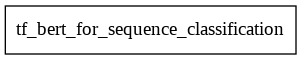

In [29]:
tf.keras.utils.plot_model(model)

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("BERT_form",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

In [31]:
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [32]:
from official.nlp import optimization

epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(tf_train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [33]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [34]:
model.compile(optimizer=optimizer,loss=loss)

In [ ]:
history = model.fit(x=tf_train_dataset,
                    validation_data=tf_validation_dataset,
                    epochs=epochs,
                    callbacks = callbacks,
                    class_weight=class_weights
)

Epoch 1/10
1724/1724 [==============================] - ETA: 0s - loss: 0.5932
Epoch 1: val_loss improved from inf to 0.47193, saving model to BERT_form


1724/1724 [==============================] - 1111s 632ms/step - loss: 0.5932 - val_loss: 0.4719
Epoch 2/10
1724/1724 [==============================] - ETA: 0s - loss: 0.5625
Epoch 2: val_loss improved from 0.47193 to 0.43424, saving model to BERT_form


1724/1724 [==============================] - 1081s 627ms/step - loss: 0.5625 - val_loss: 0.4342
Epoch 3/10
1724/1724 [==============================] - ETA: 0s - loss: 0.5273
Epoch 3: val_loss improved from 0.43424 to 0.42953, saving model to BERT_form


1724/1724 [==============================] - 1080s 626ms/step - loss: 0.5273 - val_loss: 0.4295
Epoch 4/10
1724/1724 [==============================] - ETA: 0s - loss: 0.4702
Epoch 4: val_loss did not improve from 0.42953
1724/1724 [==============================] - 1047s 608ms/step - loss: 0.4702 - val_loss: 0.5113
Epoch 5/10
1724/1724 [==============================] - ETA: 0s - loss: 0.4308Restoring model weights from the end of the best epoch: 3.

Epoch 5: val_loss did not improve from 0.42953
1724/1724 [==============================] - 1050s 609ms/step - loss: 0.4308 - val_loss: 0.6128
Epoch 5: early stopping


dict_keys(['loss', 'val_loss'])


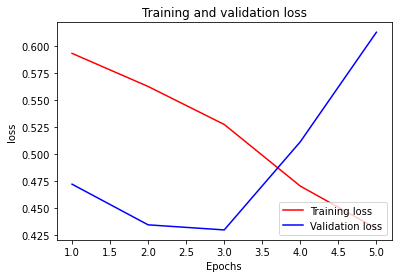

In [40]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
history_dict

{'loss': [0.5931990146636963,
  0.5625104904174805,
  0.5272989273071289,
  0.4701594412326813,
  0.43080171942710876],
 'val_loss': [0.4719258248806,
  0.4342373013496399,
  0.42953285574913025,
  0.511268138885498,
  0.6127859950065613]}

In [ ]:
# To load the best model saved
from keras.models import load_model

model = tf.keras.models.load_model(
       ('BERT_utube'),
       custom_objects={'AdamWeightDecay': optimizer}
)

##1.3 Results

In [ ]:
y_pred=model.predict(tf_test_dataset)
y_pred

213/213 [==============================] - 47s 202ms/step


TFSequenceClassifierOutput([('logits', array([[ 1.1341035 , -0.6371478 ],
                                    [ 1.9459485 , -1.380055  ],
                                    [ 2.0271528 , -1.4110502 ],
                                    ...,
                                    [ 2.0564432 , -1.443742  ],
                                    [ 1.4725075 , -0.76439613],
                                    [-1.18212   ,  1.187395  ]], dtype=float32))])

In [ ]:
y_pred[0]

array([[ 1.1341035 , -0.6371478 ],
       [ 1.9459485 , -1.380055  ],
       [ 2.0271528 , -1.4110502 ],
       ...,
       [ 2.0564432 , -1.443742  ],
       [ 1.4725075 , -0.76439613],
       [-1.18212   ,  1.187395  ]], dtype=float32)

In [ ]:
results=[]
for i in y_pred[0]:
  results.append((np.argmax(i)))

In [ ]:
results
df = pd.DataFrame (results, columns = ['BERT_Form'])

In [ ]:
df.to_csv("BERT_Form_pred.csv",index=False)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
result=precision_recall_fscore_support(y_test, results, average='macro')
print('Precision for BERT in FormSpring Dataset is:',round(result[0],3))
print('Recall for BERT in FormSpring Dataset is:',round(result[1],3))
print('macro F1 score for BERT in FormSpring Dataset is:',round(result[2],3))

Precision for BERT in FormSpring Dataset is: 0.519
Recall for BERT in FormSpring Dataset is: 0.521
macro F1 score for BERT in FormSpring Dataset is: 0.519


In [ ]:
!zip -r /content/BERT_Form.zip /content/BERT_Form

  adding: content/BERT_Form/ (stored 0%)
  adding: content/BERT_Form/saved_model.pb (deflated 93%)
  adding: content/BERT_Form/assets/ (stored 0%)
  adding: content/BERT_Form/keras_metadata.pb (deflated 95%)
  adding: content/BERT_Form/variables/ (stored 0%)
  adding: content/BERT_Form/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/BERT_Form/variables/variables.index (deflated 80%)


####1.3.1 Condusion matrix

In [ ]:
def matrix_per(cf_matrix):
  group_percentages_list=[]
  k=cf_matrix.flatten()
  for i in range(0,len(cf_matrix.flatten())):
    if i == 0 or i == 1:
      group_percentages_list.append(k[i]/(k[0] + k[1]))
    else:
      group_percentages_list.append(k[i]/(k[2] + k[3]))
  return group_percentages_list

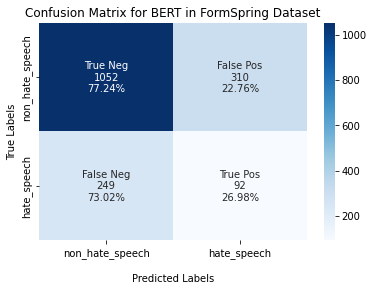

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cf_matrix=confusion_matrix(y_test, results)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_per(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for BERT in FormSpring Dataset');
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('True Labels');

ax.xaxis.set_ticklabels(['non_hate_speech','hate_speech'])
ax.yaxis.set_ticklabels(['non_hate_speech','hate_speech'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 2.YouTube Dataset

###2.1 Installing dependencies and importing packages

In [ ]:
!pip install tf-models-official

In [ ]:
!pip install datasets

In [ ]:
!pip install transformers

In [41]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.models import load_model
import datasets
from datasets.dataset_dict import DatasetDict
from datasets import Dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
import matplotlib.pyplot as plt
from official.nlp import optimization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification
from transformers import DefaultDataCollator
from transformers import AutoTokenizer
import seaborn as sns

##2.2 Reading and preparing dataset

In [42]:
df_utube=pd.read_csv('utube_clean.csv')

In [43]:
df_utube

,Text,hate_words,Label,Text_clean,hate_words_clean,category
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0,non_hate_speech
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0,non_hate_speech
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0,non_hate_speech
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...,hate_speech
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0,non_hate_speech
...,...,...,...,...,...,...
3455,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0,non_hate_speech
3456,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,0,statusonline im zxkillergirlzx im zxkillergirl...,0,non_hate_speech
3457,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0,non_hate_speech
3458,! !,0,0,NaN,0,non_hate_speech


In [44]:
df_utube.groupby('Label').count()

,Text,hate_words,Text_clean,hate_words_clean,category
Label,,,,,
0,3144,3144,3139,3144,3144
1,316,316,316,316,316


In [45]:
non_hate_speech, hate_speech = np.bincount(df_utube['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 3460
    non_hate_speech: 3144 (90.87% of total)

Examples:
    Total: 3460
    hate_speech: 316 (9.13% of total)



###2.2.1 Handling imbalanced data

In [46]:
weight_for_0 = (1 / non_hate_speech)*(total)/2.0 
weight_for_1 = (1 / hate_speech)*(total)/2.0


class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 5.47


###2.2.2 Splitting the data between train, validation and test sets:

In [47]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df_utube.index.values,
    df_utube.Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_utube.Label.values,    
)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(
    df_utube.loc[X_train_].index.values,
    df_utube.loc[X_train_].Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_utube.loc[X_train_].Label.values,  
)

In [49]:
df_utube['data_type'] = ['not_set']*df_utube.shape[0]
df_utube.loc[X_train, 'data_type'] = 'train'
df_utube.loc[X_val, 'data_type'] = 'val'
df_utube.loc[X_test, 'data_type'] = 'test'

In [50]:
df_utube

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0,non_hate_speech,train
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0,non_hate_speech,test
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0,non_hate_speech,val
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...,hate_speech,test
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0,non_hate_speech,train
...,...,...,...,...,...,...,...
3455,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0,non_hate_speech,train
3456,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,0,statusonline im zxkillergirlzx im zxkillergirl...,0,non_hate_speech,val
3457,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0,non_hate_speech,train
3458,! !,0,0,NaN,0,non_hate_speech,val


In [51]:
df_utube.groupby(['category', 'Label', 'data_type']).count()

Text  hate_words  Text_clean  \
category        Label data_type                                 
hate_speech     1     test         32          32          32   
                      train       256         256         256   
                      val          28          28          28   
non_hate_speech 0     test        314         314         313   
                      train      2546        2546        2543   
                      val         284         284         283   

                                 hate_words_clean  
category        Label data_type                    
hate_speech     1     test                     32  
                      train                   256  
                      val                      28  
non_hate_speech 0     test                    314  
                      train                  2546  
                      val                     284

In [52]:
df_train = df_utube.loc[df_utube["data_type"]=="train"]
df_train.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0,non_hate_speech,train
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0,non_hate_speech,train
5,jejus lindos de maiss carlos canta um ritmo ma...,0,0,jejus lindos de maiss carlos canta um ritmo ma...,0,non_hate_speech,train
6,Ale pajac,0,0,ale pajac,0,non_hate_speech,train
8,nicki's too sexy holy hell oh. my. god. DON'T ...,0,0,nickis sexy holy hell oh god dont turn my musi...,0,non_hate_speech,train


In [53]:
df_val = df_utube.loc[df_utube["data_type"]=="val"]
df_val.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0,non_hate_speech,val
7,"How's ,freedom, working out for you? Still liv...",0,0,hows freedom working still living foreign aid ...,0,non_hate_speech,val
16,i like that song cool video but i hated the bl...,0,0,like song cool video hated black spots kept co...,0,non_hate_speech,val
22,Osama Bin Ladin vs. Satan Note to self: Play t...,0,0,osama bin ladin vs satan note self play turbo ...,0,non_hate_speech,val
25,Monkey D. Ruffy *-*Tolles Video :)! Wow! Toll ...,0,0,monkey d ruffy tolles video wow toll gemacht e...,0,non_hate_speech,val


In [54]:
df_test = df_utube.loc[df_utube["data_type"]=="test"]
df_test.head(5)

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0,non_hate_speech,test
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...,hate_speech,test
24,She is so cute and I like this song but why di...,0,0,she cute i like song u shave hair you r pretty...,0,non_hate_speech,test
38,I put that yesterday Thumbs Up if you got here...,0,0,i put yesterday thumbs up got scary montage cl...,0,non_hate_speech,test
72,this sucks... why only big arms ? fake Its fun...,0,0,sucks big arms fake its funny fat black widow ...,0,non_hate_speech,test


In [55]:
df_train

,Text,hate_words,Label,Text_clean,hate_words_clean,category,data_type
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0,non_hate_speech,train
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0,non_hate_speech,train
5,jejus lindos de maiss carlos canta um ritmo ma...,0,0,jejus lindos de maiss carlos canta um ritmo ma...,0,non_hate_speech,train
6,Ale pajac,0,0,ale pajac,0,non_hate_speech,train
8,nicki's too sexy holy hell oh. my. god. DON'T ...,0,0,nickis sexy holy hell oh god dont turn my musi...,0,non_hate_speech,train
...,...,...,...,...,...,...,...
3453,Justin looked like he was enjoying some of Nic...,"""""YOU'RE a piece of shit you'r just a little f...",1,justin looked like enjoying nicki 330 yes yea ...,youre piece shit little faggot,hate_speech,train
3454,228((( real!!!! by walt disney=,0,0,228 real walt disney,0,non_hate_speech,train
3455,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0,non_hate_speech,train
3457,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0,non_hate_speech,train


In [56]:
df_train['Text_clean']=df_train['Text_clean'].astype(str)
df_val['Text_clean']=df_val['Text_clean'].astype(str)
df_test['Text_clean']=df_test['Text_clean'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [57]:
df_train_text_list=list(df_train['Text_clean'])
df_train_label=list(df_train['Label'])

df_test_text_list=list(df_test['Text_clean'])
df_test_label=list(df_test['Label'])

df_val_text_list=list(df_val['Text_clean'])
df_val_label=list(df_val['Label'])

In [58]:
d = {'train':Dataset.from_dict({'text':df_train_text_list,'labels':df_train_label}),
     'test':Dataset.from_dict({'text':df_test_text_list,'labels':df_test_label}),
     'val':Dataset.from_dict({'text':df_val_text_list,'labels':df_val_label})
     }

dd=DatasetDict(d)

In [59]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


def tokenize_function(examples):
  encoded= tokenizer(examples["text"], padding="max_length", truncation=True)
  return encoded.data

tokenized_datasets = dd.map(tokenize_function, batched=True)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [60]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2802
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 346
    })
    val: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 312
    })
})

In [61]:
data_collator = DefaultDataCollator(return_tensors="tf")

In [62]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["val"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

In [63]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


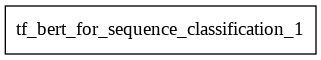

In [64]:
tf.keras.utils.plot_model(model)

In [65]:
checkpoint = ModelCheckpoint("BERT_utube",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

In [66]:
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [67]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(tf_train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [68]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [69]:
model.compile(optimizer=optimizer,loss=loss)

In [ ]:
history = model.fit(x=tf_train_dataset,
                    validation_data=tf_validation_dataset,
                    epochs=epochs,
                    callbacks = callbacks,
                    class_weight=class_weights
)

Epoch 1/10
351/351 [==============================] - ETA: 0s - loss: 0.7855
Epoch 1: val_loss improved from inf to 0.28794, saving model to BERT_utube


351/351 [==============================] - 275s 722ms/step - loss: 0.7855 - val_loss: 0.2879
Epoch 2/10
351/351 [==============================] - ETA: 0s - loss: 1.0531
Epoch 2: val_loss did not improve from 0.28794
351/351 [==============================] - 213s 607ms/step - loss: 1.0531 - val_loss: 0.3545
Epoch 3/10
351/351 [==============================] - ETA: 0s - loss: 0.9004Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.28794
351/351 [==============================] - 213s 608ms/step - loss: 0.9004 - val_loss: 0.3107
Epoch 3: early stopping


dict_keys(['loss', 'val_loss'])


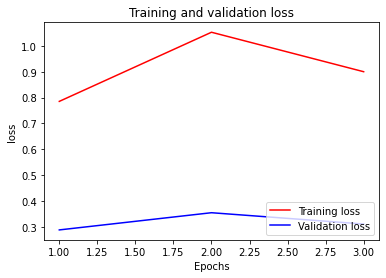

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
history_dict

{'loss': [0.7854911088943481, 1.053114652633667, 0.9003666043281555],
 'val_loss': [0.2879430949687958, 0.3545157015323639, 0.31072500348091125]}

In [ ]:
# To load the best model saved
model = tf.keras.models.load_model(
       ('BERT_utube'),
       custom_objects={'AdamWeightDecay': optimizer}
)

##2.3 Results

In [ ]:
y_pred=model.predict(tf_test_dataset)
y_pred

In [ ]:
y_pred[0]

In [ ]:
results=[]
for i in y_pred[0]:
  results.append((np.argmax(i)))

In [ ]:
result=precision_recall_fscore_support(y_test, results, average='macro')
print('Precision for BERT in YouTube Dataset is:',round(result[0],3))
print('Recall for BERT in YouTube Dataset is:',round(result[1],3))
print('macro F1 score for BERT in YouTube Dataset is:',round(result[2],3))

Precision for BERT in YouTube Dataset is: 0.454
Recall for BERT in YouTube Dataset is: 0.5
macro F1 score for BERT in YouTube Dataset is: 0.476


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###2.3.1 Confusion Matrix 

In [ ]:
def matrix_per(cf_matrix):
  group_percentages_list=[]
  k=cf_matrix.flatten()
  for i in range(0,len(cf_matrix.flatten())):
    if i == 0 or i == 1:
      group_percentages_list.append(k[i]/(k[0] + k[1]))
    else:
      group_percentages_list.append(k[i]/(k[2] + k[3]))
  return group_percentages_list

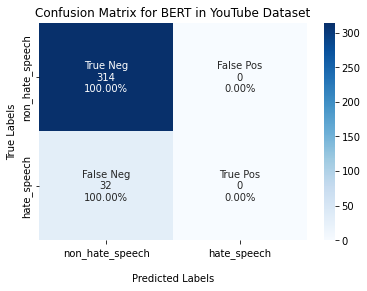

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_matrix=confusion_matrix(y_test, results)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_per(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for BERT in YouTube Dataset');
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('True Labels');

ax.xaxis.set_ticklabels(['non_hate_speech','hate_speech'])
ax.yaxis.set_ticklabels(['non_hate_speech','hate_speech'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
!zip -r /content/BERT_utube.zip /content/BERT_utube

  adding: content/BERT_Form/ (stored 0%)
  adding: content/BERT_Form/saved_model.pb (deflated 93%)
  adding: content/BERT_Form/assets/ (stored 0%)
  adding: content/BERT_Form/keras_metadata.pb (deflated 95%)
  adding: content/BERT_Form/variables/ (stored 0%)
  adding: content/BERT_Form/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/BERT_Form/variables/variables.index (deflated 80%)


# 3.Twitter Dataset

###3.1 Installing dependencies and importing packages

In [ ]:
!pip install tf-models-official

In [ ]:
!pip install datasets

In [ ]:
!pip install transformers

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.models import load_model
import datasets
from datasets.dataset_dict import DatasetDict
from datasets import Dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
import matplotlib.pyplot as plt
from official.nlp import optimization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification
from transformers import DefaultDataCollator
from transformers import AutoTokenizer
import seaborn as sns

##3.2 Reading and preparing dataset

In [ ]:
df_tw=pd.read_csv('twitter_clean.csv')

In [ ]:
df_tw

,Text,Label,Text_clean,category
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...,non_hate_speech
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,now idiots claim people tried stop becoming te...,non_hate_speech
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy,hate_speech
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly,hate_speech
4,#mkr No No No No No No,0.0,mkr no no no no no no,non_hate_speech
...,...,...,...,...
16819,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home mkr,non_hate_speech
16820,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkr pretty good dishes happy ok well i never e...,non_hate_speech
16821,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,deconstructed lemon tart please go one season ...,non_hate_speech
16822,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,you stupid talk blocked,non_hate_speech


In [ ]:
df_tw.groupby('Label').count()

,Text,Text_clean,category
Label,,,
0.0,11477,11305,11477
1.0,5347,5345,5347


In [ ]:
non_hate_speech, hate_speech = np.bincount(df_tw['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 16824
    non_hate_speech: 11477 (68.22% of total)

Examples:
    Total: 16824
    hate_speech: 5347 (31.78% of total)



###3.2.1 Handling imbalanced data

In [ ]:
weight_for_0 = (1 / non_hate_speech)*(total)/2.0 
weight_for_1 = (1 / hate_speech)*(total)/2.0


class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.73
Weight for class 1: 1.57


###3.2.2 Splitting the data between train, validation and test sets:

In [ ]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df_tw.index.values,
    df_tw.Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_tw.Label.values,    
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    df_tw.loc[X_train_].index.values,
    df_tw.loc[X_train_].Label.values,
    test_size=0.10,
    random_state=42,
    stratify=df_tw.loc[X_train_].Label.values,  
)

In [ ]:
df_tw['data_type'] = ['not_set']*df_tw.shape[0]
df_tw.loc[X_train, 'data_type'] = 'train'
df_tw.loc[X_val, 'data_type'] = 'val'
df_tw.loc[X_test, 'data_type'] = 'test'

In [ ]:
df_tw

,Text,Label,Text_clean,category,data_type
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...,non_hate_speech,train
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,now idiots claim people tried stop becoming te...,non_hate_speech,val
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy,hate_speech,train
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly,hate_speech,train
4,#mkr No No No No No No,0.0,mkr no no no no no no,non_hate_speech,train
...,...,...,...,...,...
16819,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home mkr,non_hate_speech,train
16820,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkr pretty good dishes happy ok well i never e...,non_hate_speech,train
16821,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,deconstructed lemon tart please go one season ...,non_hate_speech,val
16822,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,you stupid talk blocked,non_hate_speech,train


In [ ]:
df_tw.groupby(['category', 'Label', 'data_type']).count()

Text  Text_clean
category        Label data_type                  
hate_speech     1.0   test        535         535
                      train      4331        4329
                      val         481         481
non_hate_speech 0.0   test       1148        1126
                      train      9295        9158
                      val        1034        1021

In [ ]:
df_train = df_tw.loc[df_tw["data_type"]=="train"]
df_train.head(5)

,Text,Label,Text_clean,category,data_type
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...,non_hate_speech,train
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy,hate_speech,train
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly,hate_speech,train
4,#mkr No No No No No No,0.0,mkr no no no no no no,non_hate_speech,train
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,saudi preacher raped tortured five year old da...,non_hate_speech,train


In [ ]:
df_val = df_tw.loc[df_tw["data_type"]=="val"]
df_val.head(5)

,Text,Label,Text_clean,category,data_type
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,now idiots claim people tried stop becoming te...,non_hate_speech,val
10,@dllvllHllvllb @hyperion5182 @PolitiBunny @The...,0.0,autoblocker run blockbot blocking manually,non_hate_speech,val
11,@SirajZarook @OdiniaInvictus @BilalIGhumman @I...,1.0,a good muslim good despite bad religion,hate_speech,val
18,Juxtaposition. http://t.co/11cqlxSUsf,0.0,juxtaposition,non_hate_speech,val
32,@chilblane yay. i went last year and had to ma...,0.0,yay went last year make new friends hate makin...,non_hate_speech,val


In [ ]:
df_test = df_tw.loc[df_tw["data_type"]=="test"]
df_test.head(5)

,Text,Label,Text_clean,category,data_type
6,RT @Millhouse66 @Maureen_JS nooo not sexist bu...,1.0,_js nooo sexist women bad drivers,hate_speech,test
7,Going to make some pancakes.....Don't hve any ...,0.0,going make pancakes don hve strawberries i hve...,non_hate_speech,test
8,RT @ahtweet: @freebsdgirl How dare you have fe...,0.0,how dare feelings fantastic way dehumanize som...,non_hate_speech,test
15,@Israelites234 @jacquard612 @Loveussr ROFLMAO....,0.0,roflmao the putin delusion factory running ful...,non_hate_speech,test
30,RT @TheMeninism: guys who sell drugs get more ...,1.0,guys sell drugs get girls guys degrees says wo...,hate_speech,test


In [ ]:
df_train

,Text,Label,Text_clean,category,data_type
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...,non_hate_speech,train
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy,hate_speech,train
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly,hate_speech,train
4,#mkr No No No No No No,0.0,mkr no no no no no no,non_hate_speech,train
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,saudi preacher raped tortured five year old da...,non_hate_speech,train
...,...,...,...,...,...
16818,"Soz my kitchen rules I've lost interest, the i...",0.0,soz kitchen rules i lost interest instants res...,non_hate_speech,train
16819,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home mkr,non_hate_speech,train
16820,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkr pretty good dishes happy ok well i never e...,non_hate_speech,train
16822,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,you stupid talk blocked,non_hate_speech,train


In [ ]:
df_train['Text_clean']=df_train['Text_clean'].astype(str)
df_val['Text_clean']=df_val['Text_clean'].astype(str)
df_test['Text_clean']=df_test['Text_clean'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_train_text_list=list(df_train['Text_clean'])
df_train_label=list(df_train['Label'])

df_test_text_list=list(df_test['Text_clean'])
df_test_label=list(df_test['Label'])

df_val_text_list=list(df_val['Text_clean'])
df_val_label=list(df_val['Label'])

In [ ]:
d = {'train':Dataset.from_dict({'text':df_train_text_list,'labels':df_train_label}),
     'test':Dataset.from_dict({'text':df_test_text_list,'labels':df_test_label}),
     'val':Dataset.from_dict({'text':df_val_text_list,'labels':df_val_label})
     }

dd=DatasetDict(d)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
  encoded= tokenizer(examples["text"], padding="max_length", truncation=True)
  return encoded.data

tokenized_datasets = dd.map(tokenize_function, batched=True)

  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 13626
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1683
    })
    val: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1515
    })
})

In [ ]:
data_collator = DefaultDataCollator(return_tensors="tf")

In [ ]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["val"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


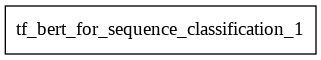

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
checkpoint = ModelCheckpoint("BERT_twitter",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(tf_train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer,loss=loss)

In [ ]:
history = model.fit(x=tf_train_dataset,
                    validation_data=tf_validation_dataset,
                    epochs=epochs,
                    callbacks = callbacks,
                    class_weight=class_weights
)

Epoch 1/10
1704/1704 [==============================] - ETA: 0s - loss: 0.5269
Epoch 1: val_loss improved from inf to 0.45626, saving model to BERT_twitter


1704/1704 [==============================] - 1096s 631ms/step - loss: 0.5269 - val_loss: 0.4563
Epoch 2/10
1704/1704 [==============================] - ETA: 0s - loss: 0.4231
Epoch 2: val_loss improved from 0.45626 to 0.44886, saving model to BERT_twitter


1704/1704 [==============================] - 1069s 627ms/step - loss: 0.4231 - val_loss: 0.4489
Epoch 3/10
1704/1704 [==============================] - ETA: 0s - loss: 0.3232
Epoch 3: val_loss did not improve from 0.44886
1704/1704 [==============================] - 1039s 610ms/step - loss: 0.3232 - val_loss: 0.6533
Epoch 4/10
1704/1704 [==============================] - ETA: 0s - loss: 0.2183Restoring model weights from the end of the best epoch: 2.

Epoch 4: val_loss did not improve from 0.44886
1704/1704 [==============================] - 1036s 608ms/step - loss: 0.2183 - val_loss: 0.7001
Epoch 4: early stopping


dict_keys(['loss', 'val_loss'])


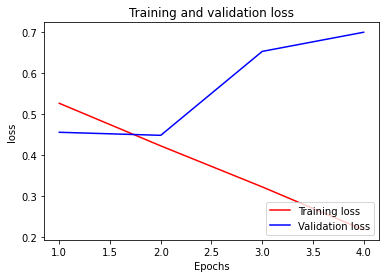

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
history_dict

{'loss': [0.5268893837928772,
  0.42314910888671875,
  0.32319918274879456,
  0.218342125415802],
 'val_loss': [0.45626482367515564,
  0.44885948300361633,
  0.6533488631248474,
  0.7000623941421509]}

In [ ]:
model1 = tf.keras.models.load_model(
       ('BERT_utube'),
       custom_objects={'AdamWeightDecay': optimizer}
)

##3.3 Results

In [ ]:
y_pred=model.predict(tf_test_dataset)
y_pred

211/211 [==============================] - 47s 211ms/step


TFSequenceClassifierOutput([('logits', array([[ 1.0985285 , -1.3090298 ],
                                    [-1.2858479 ,  1.8992447 ],
                                    [-1.6400236 ,  1.9826258 ],
                                    ...,
                                    [ 0.72574914, -1.1618661 ],
                                    [-1.3778013 ,  1.8218403 ],
                                    [-1.7046129 ,  1.9994633 ]], dtype=float32))])

In [ ]:
y_pred[0]

array([[ 1.4977112, -1.6325171],
       [-1.6094265,  1.3305182],
       [ 1.9096465, -2.0321612],
       ...,
       [-2.352357 ,  2.4259474],
       [ 1.8654338, -1.9324166],
       [ 1.6121814, -1.7420143]], dtype=float32)

In [ ]:
results=[]
for i in y_pred[0]:
  results.append((np.argmax(i)))

In [ ]:
result=precision_recall_fscore_support(y_test, results, average='macro')
print('Precision for BERT in Twitter Dataset is:',round(result[0],3))
print('Recall for BERT in Twitter Dataset is:',round(result[1],3))
print('macro F1 score for BERT in Twitter Dataset is:',round(result[2],3))

Precision for BERT in Twitter Dataset is: 0.492
Recall for BERT in Twitter Dataset is: 0.491
macro F1 score for BERT in Twitter Dataset is: 0.49


###3.3.1 Confusion Matrix 

In [ ]:
def matrix_per(cf_matrix):
  group_percentages_list=[]
  k=cf_matrix.flatten()
  for i in range(0,len(cf_matrix.flatten())):
    if i == 0 or i == 1:
      group_percentages_list.append(k[i]/(k[0] + k[1]))
    else:
      group_percentages_list.append(k[i]/(k[2] + k[3]))
  return group_percentages_list

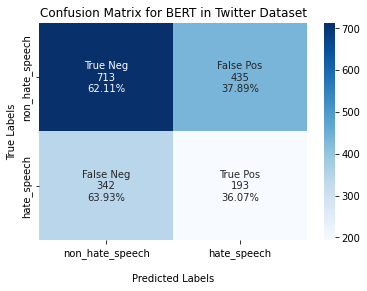

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_matrix=confusion_matrix(y_test, results)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_per(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for BERT in Twitter Dataset');
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('True Labels');

ax.xaxis.set_ticklabels(['non_hate_speech','hate_speech'])
ax.yaxis.set_ticklabels(['non_hate_speech','hate_speech'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
!zip -r /content/BERT_twitter.zip /content/BERT_twitter

  adding: content/BERT_Form/ (stored 0%)
  adding: content/BERT_Form/saved_model.pb (deflated 93%)
  adding: content/BERT_Form/assets/ (stored 0%)
  adding: content/BERT_Form/keras_metadata.pb (deflated 95%)
  adding: content/BERT_Form/variables/ (stored 0%)
  adding: content/BERT_Form/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/BERT_Form/variables/variables.index (deflated 80%)
